In [102]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy.integrate import quad
import plotly.graph_objects as go
from IPython.display import HTML
import sympy as smp
from sympy.vector import cross

In [103]:
phi, x, y, z = smp.symbols('\phi, x, y, z')

#l = (1+(3/4)*smp.sin(3*phi))*smp.Matrix([smp.cos(phi), smp.sin(phi), 0])
l = smp.Matrix([smp.tan(phi),0,0])

lx, ly, lz = smp.lambdify(phi, l[0]), smp.lambdify(phi, l[1]),smp.lambdify(phi, l[2])
pos = smp.Matrix([x, y, z])
r = pos - l


In [104]:
integrand = smp.diff(l, phi).cross(r) / r.norm()**3
dBxdphi = smp.lambdify([phi, x, y, z], integrand[0])
dBydphi = smp.lambdify([phi, x, y, z], integrand[1])
dBzdphi = smp.lambdify([phi, x, y, z], integrand[2])

def B(x, y, z):
    return np.array([quad(dBxdphi, 0, 2*np.pi, args=(x, y, z))[0],
                     quad(dBydphi, 0, 2*np.pi, args=(x, y, z))[0],
                     quad(dBzdphi, 0, 2*np.pi, args=(x, y, z))[0]])

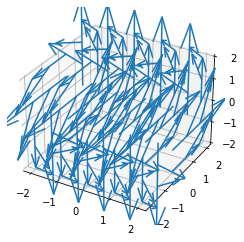

In [117]:
x, y, z = np.linspace(-2, 2, 5), np.linspace(-2, 2, 5), np.linspace(-2, 2, 5)

ax = plt.figure().add_subplot(projection='3d')

for a in x:
    for b in y:
        for c in z:
            ax.quiver(a,b,c,B(a,b,c)[0], B(a,b,c)[1], B(a,b,c)[2])

plt.show()


In [116]:
x = np.linspace(-2, 2, 20)
xv, yv, zv = np.meshgrid(x, x, x)

B_field = np.vectorize(B, signature='(),(),()->(n)')(xv, yv, zv)
Bx = B_field[:,:,:,0]
By = B_field[:,:,:,1]
Bz = B_field[:,:,:,2]

#explodir qnd chega mt perto
Bx[Bx>20] = 20
By[By>20] = 20
Bz[Bz>20] = 20

Bx[Bx<-20] = -20
By[By<-20] = -20
Bz[Bz<-20] = -20

In [ ]:
data = go.Cone(x=xv.ravel(), y=yv.ravel(), z=zv.ravel(),
               u=Bx.ravel(), v=By.ravel(), w=Bz.ravel(),
               colorscale='Inferno', colorbar=dict(title='$x^2$'),
               sizemode="absolute", sizeref=20)

layout = go.Layout(title=r'Plot Title',
                     scene=dict(xaxis_title=r'x',
                                yaxis_title=r'y',
                                zaxis_title=r'z',
                                aspectratio=dict(x=1, y=1, z=1),
                                camera_eye=dict(x=1.2, y=1.2, z=1.2)))

fig = go.Figure(data = data, layout=layout)
phi = np.linspace(0, 2*np.pi, 100)
fig.add_scatter3d(x=[lx(i) for i in phi], y=[ly(i) for i in phi], z= [lz(i) for i in phi], mode='lines',
                  line = dict(color='green', width=10))

fig.write_html("wire.html")